#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression


#### Loading Dataset

In [2]:
df = pd.read_csv("C:\\Users\\Sapna\\Downloads\\train_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Performing EDA

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

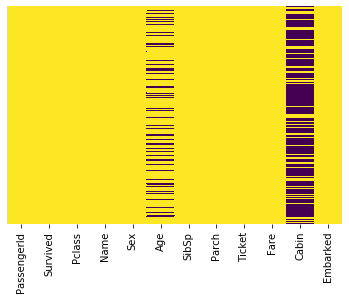

In [6]:
# plotting heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar = False,cmap = 'viridis_r')

In [7]:
# droping columns 
df.drop(columns = ['Cabin','PassengerId'],inplace = True)

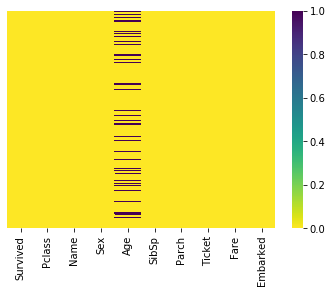

In [8]:

sns.heatmap(df.isnull(),yticklabels=False,cmap = 'viridis_r')

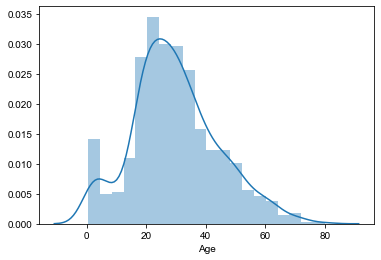

In [9]:
sns.distplot(df['Age'],bins = 20)
sns.set()

In [10]:
df['Age'].fillna(df['Age'].mean(),inplace=True)


In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [12]:
df.dropna(how = 'any',inplace = True)

In [13]:
df.shape

(889, 10)

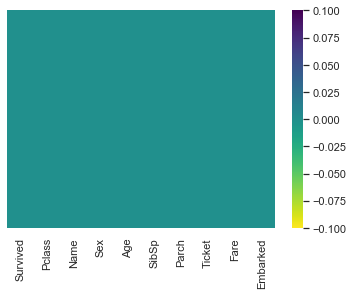

In [14]:

sns.heatmap(df.isnull(),yticklabels=False,cmap = 'viridis_r')

In [15]:
categorical_columns = df.select_dtypes(include = 'object').columns

categorical_columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [16]:
# converting categorical columns to numerical columns 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in categorical_columns:
    df[feature] = le.fit_transform(df[feature].astype(str))
    

In [27]:
df.dtypes

Survived      int64
Pclass        int64
Name          int32
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Ticket        int32
Fare        float64
Embarked      int32
dtype: object

#### splitting x and y variable

In [18]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

#### Feature Scaling
For better accuracy

In [19]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
x[0:4]

array([[ 0.82520863, -1.30926758,  0.73534203, -0.59049493,  0.43135024,
        -0.47432585,  0.91701764, -0.50023975,  0.58683958],
       [-1.57221121, -0.98974394, -1.35991138,  0.64397101,  0.43135024,
        -0.47432585,  1.28135338,  0.78894661, -1.93955453],
       [ 0.82520863, -0.3545933 , -1.35991138, -0.28187844, -0.47519908,
        -0.47432585,  1.64568912, -0.48664993,  0.58683958],
       [-1.57221121, -0.67022031, -1.35991138,  0.41250865,  0.43135024,
        -0.47432585, -1.44866925,  0.42286111,  0.58683958]])

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((711, 9), (178, 9), (711,), (178,))

#### Model building

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
ypredict = model.predict(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score

#### Model evaluation

In [24]:
cm = confusion_matrix(y_test,ypredict)
cm

array([[87, 22],
       [15, 54]], dtype=int64)

In [25]:
acc = accuracy_score(y_test,ypredict)
acc

0.7921348314606742